In [33]:
import os
import io
import librosa
import matplotlib.pyplot as plt
import sounddevice as sd
import numpy as np
import math

In [34]:
file_names = [filename.split('.')[0]
              for filename in os.listdir("/home/jyothish/Projects/Audio-Denoising-with-Autoencoders/data/clean/test")
              if filename.endswith('.wav')]

In [35]:
file_names

['alternative_50_Minutes-Nightwalk', 'alternative_50_Minutes-Colours']

In [36]:
for name in file_names:
    
    signal, sr = librosa.load("/home/jyothish/Projects/Audio-Denoising-with-Autoencoders/data/clean/test/" + name + ".wav")

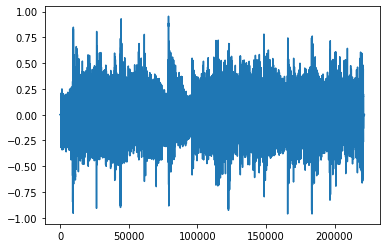

In [38]:
plt.plot(signal)

In [39]:
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

In [91]:
noise = get_white_noise(signal, 32)

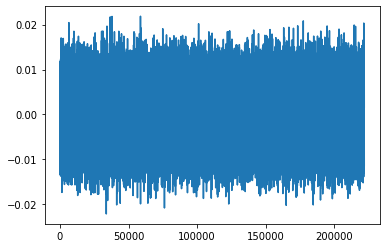

In [92]:
plt.plot(noise)

In [93]:
signal_noise = signal + noise

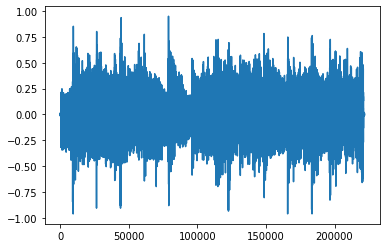

In [94]:
plt.plot(signal_noise)

In [98]:
# Orginal
sd.play(signal, sr)

In [99]:
# Noisy
sd.play(signal_noise, sr)